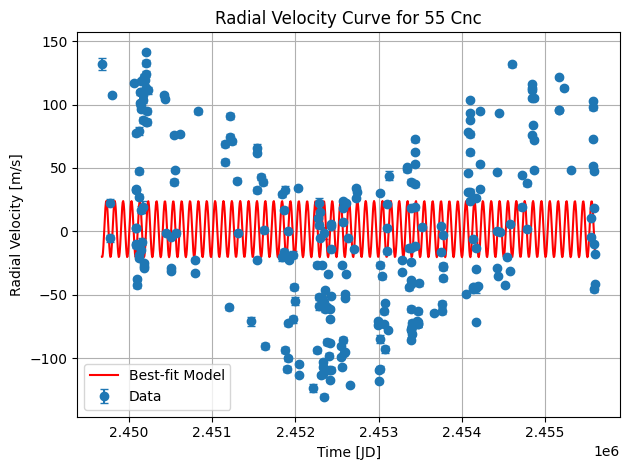

Standard deviation of residuals (1st fit): 66.58 m/s
Fit parameters: K = 22.17, P = 100.52, phase = 794.50, offset = 1.73


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


data = np.loadtxt('55Cnc_RV_274pts.txt', skiprows=22)  #actual data starts later
time = data[:, 0]
rv = data[:, 1]
rv_err = data[:, 2]

# Define a sinusoidal RV function
def rv_model(t, K, P, phi, offset):
    return K * np.sin(2 * np.pi * t / P + phi) + offset

# Make a first guess for parameters: [K, P, φ, offset]
# These can be tweaked depending on how the fit looks
K_guess = 70     # in m/s
P_guess = 100     # increased this (previously 14)
phi_guess = 0.0
offset_guess = np.mean(rv)

p0 = [K_guess, P_guess, phi_guess, offset_guess]

# Fit the model to the data
popt, pcov = curve_fit(rv_model, time, rv, p0=p0, sigma=rv_err, absolute_sigma=True, maxfev=100000) #increased maxfev
K_fit, P_fit, phi_fit, offset_fit = popt

# replaced previous rv_fit = rv_model(time, *popt)
t_fit = np.linspace(np.min(time), np.max(time), 1000)
rv_fit = rv_model(t_fit, *popt)

# Plot data with error bars and best-fit model
plt.errorbar(time, rv, yerr=rv_err, fmt='o', capsize=3, label='Data')
plt.plot(t_fit, rv_fit, 'r-', label='Best-fit Model') #updated
plt.xlabel('Time [JD]')
plt.ylabel('Radial Velocity [m/s]')
plt.title('Radial Velocity Curve for 55 Cnc')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('55Cnc_RV_Fit.pdf')
plt.show()

# Store fit parameters for Step 4
K_fit = popt[0]
P_fit = popt[1]
phi_fit = popt[2]
offset_fit = popt[3]

# residuals and standard deviation (for debugging)
residuals = rv - rv_model(time, *popt)
std_dev = np.std(residuals)

# resultssss
print(f"Standard deviation of residuals (1st fit): {std_dev:.2f} m/s")
print(f"Fit parameters: K = {K_fit:.2f}, P = {P_fit:.2f}, phase = {phi_fit:.2f}, offset = {offset_fit:.2f}")

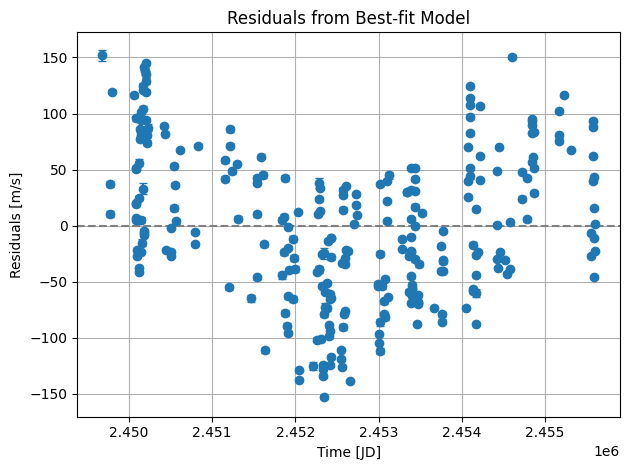

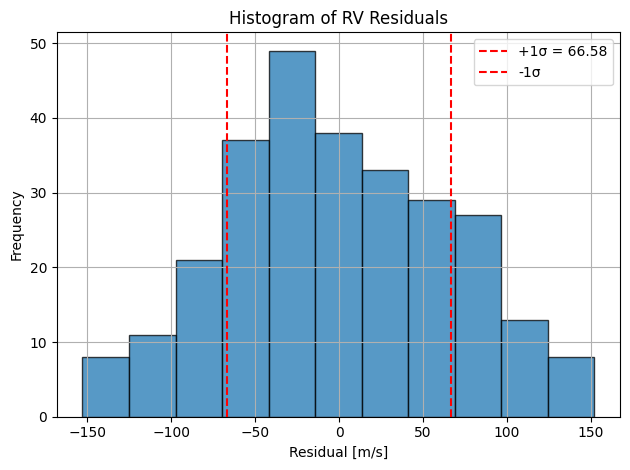

Standard deviation of residuals: 66.58 m/s
Fit parameters: K = 22.17, P = 100.52, phase = 794.50, offset = 1.73


In [28]:
residuals = rv - rv_model(time, *popt)

#residuals by time plot
plt.errorbar(time, residuals, yerr=rv_err, fmt='o', capsize=3)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Time [JD]')
plt.ylabel('Residuals [m/s]')
plt.title('Residuals from Best-fit Model')
plt.grid(True)
plt.tight_layout()
plt.savefig('55Cnc_Residuals_Time.pdf')
plt.show()

#histogram
plt.hist(residuals, bins='auto', edgecolor='black', alpha=0.75)
plt.xlabel('Residual [m/s]')
plt.ylabel('Frequency')
plt.title('Histogram of RV Residuals')

#standard deviation
res_std = np.std(residuals)
plt.axvline(res_std, color='red', linestyle='--', label=f'+1σ = {res_std:.2f}')
plt.axvline(-res_std, color='red', linestyle='--', label=f'-1σ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('55Cnc_Residuals_Histogram.pdf')
plt.show()

#print result
print(f"Standard deviation of residuals: {res_std:.2f} m/s")
print(f"Fit parameters: K = {K_fit:.2f}, P = {P_fit:.2f}, phase = {phi_fit:.2f}, offset = {offset_fit:.2f}")

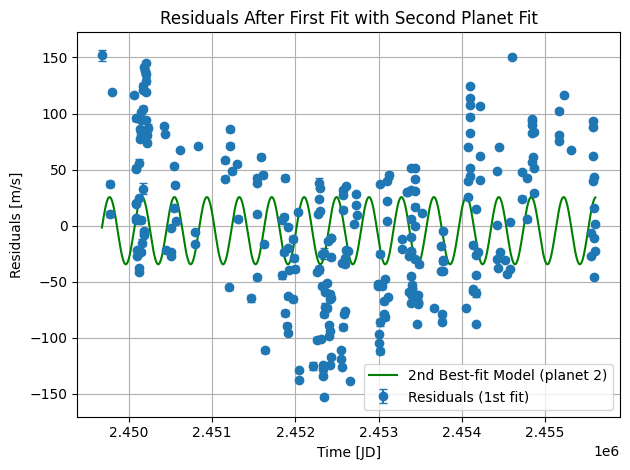

Standard deviation before 2nd fit: 66.58 m/s
Standard deviation after  2nd fit: 61.78 m/s
Std Dev (improvement): 4.80 m/s


In [60]:
def rv_model(t, K, P, phi, offset):
    return K * np.sin(2 * np.pi * t / P + phi) + offset

#residuals from step 4
residuals = rv - rv_model(time, K_fit, P_fit, phi_fit, offset_fit)

# new guesses 
K2_guess = 10    
P2_guess = 400 
phi2_guess = 0.0
offset2_guess = 0.0 

p0_2 = [K2_guess, P2_guess, phi2_guess, offset2_guess]

# second model fit
popt2, pcov2 = curve_fit(rv_model, time, residuals, p0=p0_2, sigma=rv_err, absolute_sigma=True)
K2_fit, P2_fit, phi2_fit, offset2_fit = popt2


t_fit2 = np.linspace(min(time), max(time), 1000)  #smoooooth (?)
rv2_fit_smooth = rv_model(t_fit2, *popt2)

#residuals with new model
plt.errorbar(time, residuals, yerr=rv_err, fmt='o', capsize=3, label='Residuals (1st fit)')
plt.plot(t_fit2, rv2_fit_smooth, 'g-', label='2nd Best-fit Model (planet 2)')
plt.xlabel('Time [JD]')
plt.ylabel('Residuals [m/s]')
plt.title('Residuals After First Fit with Second Planet Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

residuals_after = residuals - rv_model(time, *popt2)

# standard devs
std_before = np.std(residuals)
std_after = np.std(residuals_after)

print(f"Standard deviation before 2nd fit: {std_before:.2f} m/s")
print(f"Standard deviation after  2nd fit: {std_after:.2f} m/s")
print(f"Std Dev (improvement): {std_before - std_after:.2f} m/s")


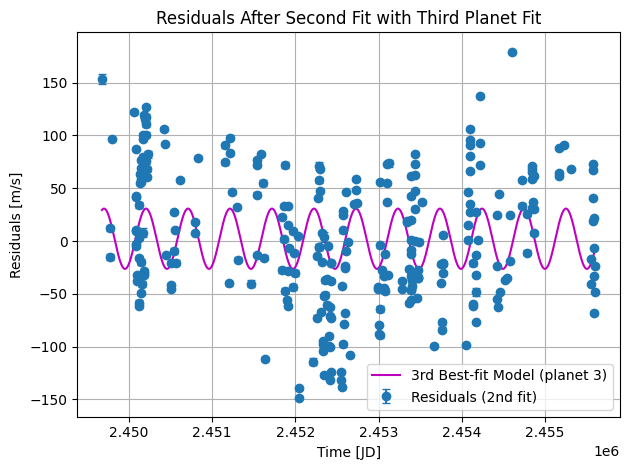

Standard deviation before 3rd fit: 61.78 m/s
Standard deviation after  3rd fit: 58.64 m/s
Std Dev (improvement): 3.14 m/s


In [61]:

#residuals from the second fit
residuals_after = residuals - rv_model(time, *popt2)


K3_guess = 5      
P3_guess = 510
phi3_guess = 0.0
offset3_guess = 0.0

p0_3 = [K3_guess, P3_guess, phi3_guess, offset3_guess]

popt3, pcov3 = curve_fit(rv_model, time, residuals_after, p0=p0_3, sigma=rv_err, absolute_sigma=True)
K3_fit, P3_fit, phi3_fit, offset3_fit = popt3

t_fit3 = np.linspace(min(time), max(time), 1000)
rv3_fit_smooth = rv_model(t_fit3, *popt3)

#residuals from second fit overlaid with new model 
plt.errorbar(time, residuals_after, yerr=rv_err, fmt='o', capsize=3, label='Residuals (2nd fit)')
plt.plot(t_fit3, rv3_fit_smooth, 'm-', label='3rd Best-fit Model (planet 3)')
plt.xlabel('Time [JD]')
plt.ylabel('Residuals [m/s]')
plt.title('Residuals After Second Fit with Third Planet Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
residuals_after_3 = residuals_after - rv_model(time, *popt3)

#std dev improvements
std_before_3 = np.std(residuals_after)
std_after_3 = np.std(residuals_after_3)
print(f"Standard deviation before 3rd fit: {std_before_3:.2f} m/s")
print(f"Standard deviation after  3rd fit: {std_after_3:.2f} m/s")
print(f"Std Dev (improvement): {std_before_3 - std_after_3:.2f} m/s")
